## Import the libraries

In [1]:
import requests
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse

In [2]:
import numpy
print(numpy.__version__)

1.16.3


## Connect to Alpha Vantage to get data

In [2]:
with open('api_key.txt', 'r') as f:
    api_key = f.read()
main_url = 'https://www.alphavantage.co/query?'
stock = 'MSFT'

In [3]:
def get_stock_data_in_json():
    url = main_url + urllib.parse.urlencode({'function': 'TIME_SERIES_DAILY', 'symbol': stock, 'apikey': api_key})
    response = requests.get(url)
    if response.status_code != 200:
        print('Invalid input, please try again.')
        return {}
    return json.loads(response.content)

In [4]:
json_data = get_stock_data_in_json()

## Explore Json Data

In [5]:
json_data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2019-05-07 16:00:01',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [6]:
json_data['Time Series (Daily)']['2019-05-07']

{'1. open': '126.4600',
 '2. high': '127.1800',
 '3. low': '124.2200',
 '4. close': '125.5200',
 '5. volume': '29668413'}

## Convert JSON to Pandas DataFrame

In [7]:
def convert_json_to_dataframe(json_data):
    df = pd.DataFrame(json_data['Time Series (Daily)']).T
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df = df.apply(pd.to_numeric)
    df.sort_index(inplace=True)
    return df

In [8]:
df = convert_json_to_dataframe(json_data)

In [9]:
# We are only interested in the daily highest stock price
high = df.iloc[:,1]

## Explore the DataFrame

In [10]:
df.head()

,open,high,low,close,volume
2018-12-12,110.89,111.27,109.04,109.08,36183020
2018-12-13,109.58,110.87,108.63,109.45,31333362
2018-12-14,108.25,109.26,105.50,106.03,47043136
2018-12-17,105.41,105.80,101.71,102.89,56957314
2018-12-18,103.75,104.51,102.52,103.97,49319196


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2018-12-12 to 2019-05-07
Data columns (total 5 columns):
open      100 non-null float64
high      100 non-null float64
low       100 non-null float64
close     100 non-null float64
volume    100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.7+ KB


In [12]:
df.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,111.960900,112.914933,110.878759,112.033100,3.024284e+07
std,8.732549,8.539545,8.975551,8.743023,1.379746e+07
min,95.140000,97.970000,93.960000,94.130000,1.407179e+07
25%,104.970000,106.141250,104.282575,105.265000,2.249625e+07
50%,110.940000,111.410000,109.842500,110.740000,2.755669e+07
75%,118.977500,119.552500,118.170000,119.212500,3.257188e+07
max,130.530000,131.370000,129.394700,130.600000,1.112421e+08


Text(0.5, 1.0, 'Stock MSFT Daily High for Last 100 Days')

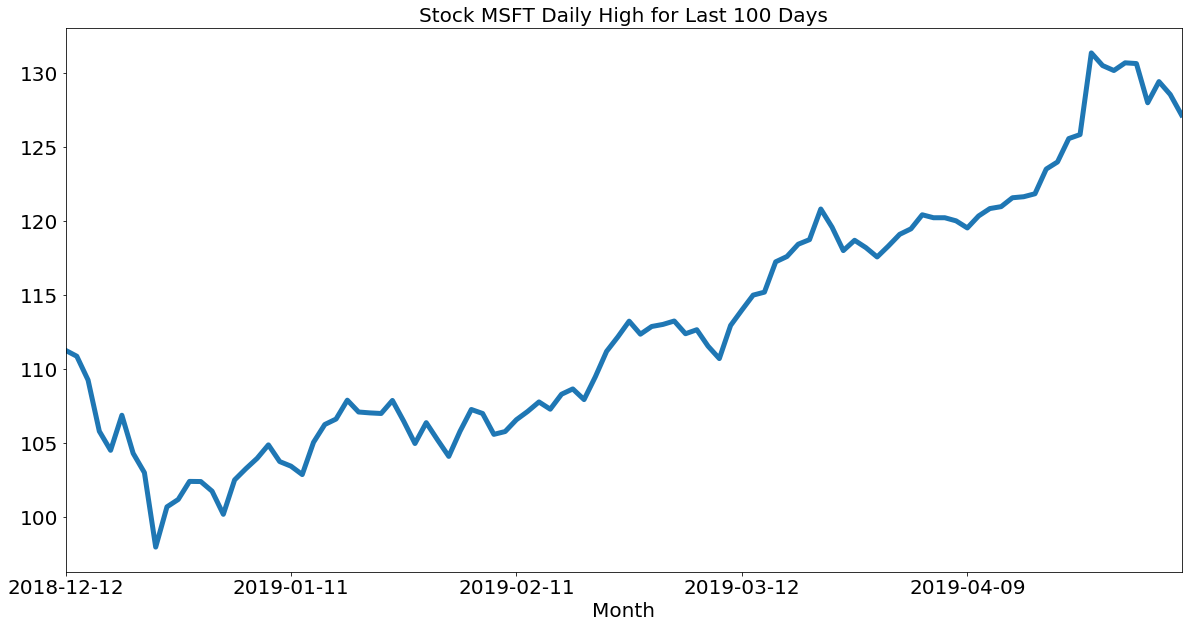

In [13]:
high.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);
plt.title('Stock {} Daily High for Last 100 Days'.format(json_data['Meta Data']['2. Symbol']), fontsize=20)

Text(0.5, 1.0, 'Stock MSFT 12 Rolling Daily Average High for Last 100 Days')

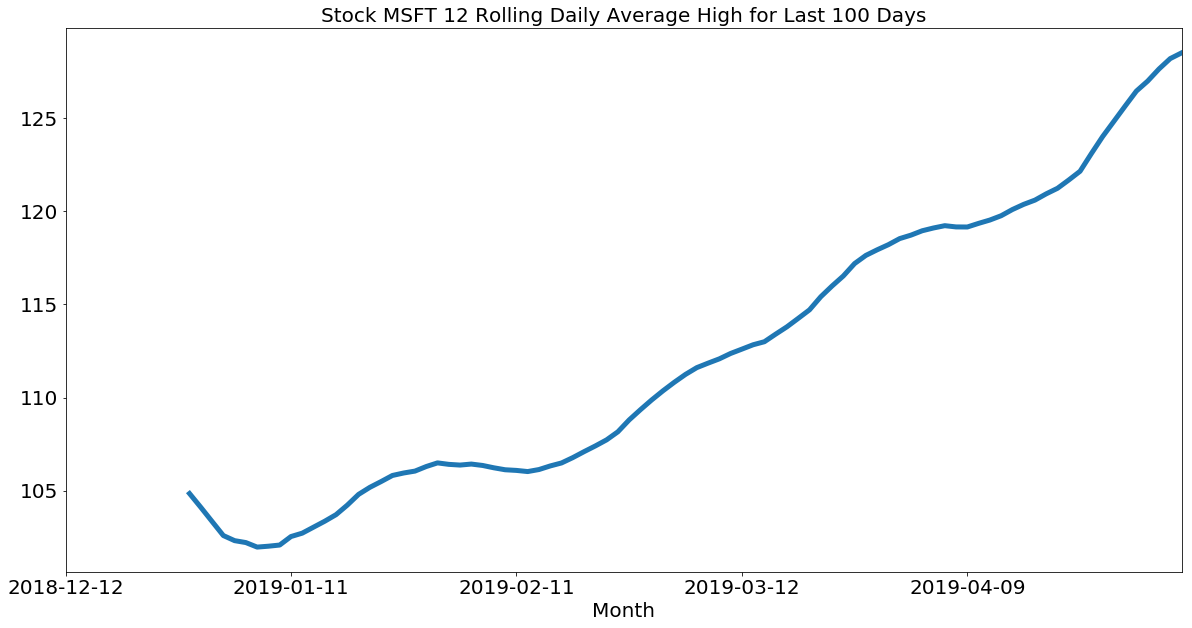

In [14]:
high.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);
plt.title('Stock {} 12 Rolling Daily Average High for Last 100 Days'.format(json_data['Meta Data']['2. Symbol']), fontsize=20)

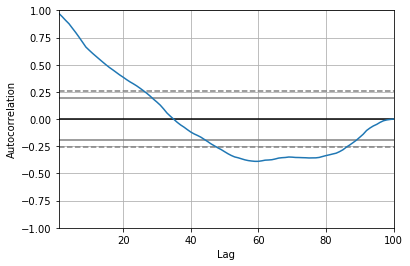

In [15]:
pd.plotting.autocorrelation_plot(high);

## Fitting ARIMA Model to Data

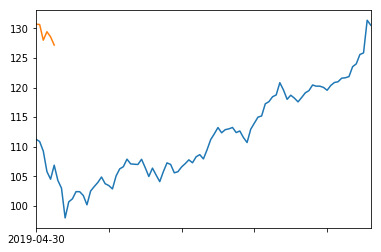

In [16]:
train = high[:93]
valid = high[94:]
train.plot()
valid.plot()

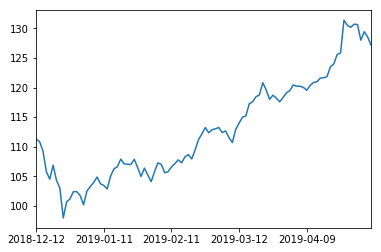

In [17]:
high.plot()

In [18]:
from sklearn.metrics import mean_squared_error

In [21]:
from pyramid.arima import auto_arima

In [23]:
model = pyramid.arima.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

AttributeError: module 'pyramid' has no attribute 'arima'

In [ ]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)

#plotting the data
train['International airline passengers'].plot()
valid['International airline passengers'].plot()



model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()